In [120]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from config import weather_key
from scipy.stats import linregress
from citipy import citipy
import json

In [121]:
# save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# building partial query url
query_url = f'{url}appid={weather_key}&units={units}&q='

In [122]:
# range of latitude and longitude
lat = (-90,90)
lng = (-180,180)

# define count to pass through
count = 0
set_counter = 0

In [123]:
# list to hold cities and coordinates
cities = []
latutides_longitudes = []


# using uniform distribution, create a set of random latitudes and longitudes
latitudes = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
longitudes = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# identify nearest city for each coordinates combination
for lat_lng in latitudes_longitudes:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities: # only add to list if the city found is unique
        cities.append(city)
        
#print(cities)
#len(cities)

# get a glimpse of the json print for df variable creation
response = requests.get(query_url+city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.6145,
        "lon": -37.6368
    },
    "dt": 1655176671,
    "id": 3424607,
    "main": {
        "feels_like": 32.5,
        "grnd_level": 983,
        "humidity": 98,
        "pressure": 988,
        "sea_level": 988,
        "temp": 39.36,
        "temp_max": 39.36,
        "temp_min": 39.36
    },
    "name": "Tasiilaq",
    "rain": {
        "1h": 2.6
    },
    "sys": {
        "country": "GL",
        "id": 81,
        "sunrise": 1655176098,
        "sunset": 1655258007,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 125,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 54,
        "gust": 24.74,
        "speed": 10.8
    }
}


#  API calls

In [124]:
# set empty lists of variables for df creation 
info = 0
citi = []
latitudes = []
longitudes = []
cloudiness = []
humidity = []
temperatures = []
windspeed = []
country = []
city_name = []
date = []


print('Beginning data retrieval\n----------------------------')
# loop through url info to generate dataframe columns
for city in cities:
    
    # create search query
    response = requests.get(query_url + city).json()
    try:
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temperatures.append(response['main']['temp'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        if count < 50: 
            count = 1
            set_counter += 1
            citi.append(city)
        else:
            count = 1
            set_counter += 1
        print(f'Processing record {count} for set {set_counter} | {city}')
    except Exception:
        print(f'City not found. Skipping...')
print('----------\nData retrieval complete:)\n-----------')

Beginning data retrieval
----------------------------
Processing record 1 for set 1 | port alfred
Processing record 1 for set 2 | sfantu gheorghe
Processing record 1 for set 3 | matale
Processing record 1 for set 4 | mar del plata
Processing record 1 for set 5 | bluff
Processing record 1 for set 6 | jiwani
Processing record 1 for set 7 | baruun-urt
Processing record 1 for set 8 | norman wells
Processing record 1 for set 9 | hermanus
City not found. Skipping...
Processing record 1 for set 10 | darmanesti
City not found. Skipping...
Processing record 1 for set 11 | cidreira
City not found. Skipping...
Processing record 1 for set 12 | rikitea
Processing record 1 for set 13 | hobart
Processing record 1 for set 14 | mana
Processing record 1 for set 15 | vaini
Processing record 1 for set 16 | saskylakh
Processing record 1 for set 17 | guiratinga
Processing record 1 for set 18 | carnarvon
Processing record 1 for set 19 | avarua
Processing record 1 for set 20 | emerald
Processing record 1 for 

Processing record 1 for set 178 | mount gambier
Processing record 1 for set 179 | morondava
Processing record 1 for set 180 | akyab
Processing record 1 for set 181 | talcahuano
Processing record 1 for set 182 | takaka
Processing record 1 for set 183 | bulgan
City not found. Skipping...
Processing record 1 for set 184 | husavik
Processing record 1 for set 185 | dhidhdhoo
City not found. Skipping...
Processing record 1 for set 186 | pisco
Processing record 1 for set 187 | nicoya
City not found. Skipping...
Processing record 1 for set 188 | hofn
Processing record 1 for set 189 | codrington
Processing record 1 for set 190 | avera
Processing record 1 for set 191 | provideniya
Processing record 1 for set 192 | ribeira grande
Processing record 1 for set 193 | pafos
Processing record 1 for set 194 | gat
Processing record 1 for set 195 | boda
Processing record 1 for set 196 | charlestown
Processing record 1 for set 197 | puntarenas
Processing record 1 for set 198 | westport
Processing record 1 

Processing record 1 for set 358 | lev tolstoy
Processing record 1 for set 359 | mocuba
City not found. Skipping...
City not found. Skipping...
Processing record 1 for set 360 | mubi
Processing record 1 for set 361 | hinton
Processing record 1 for set 362 | taoudenni
Processing record 1 for set 363 | mimoso do sul
Processing record 1 for set 364 | vila do maio
Processing record 1 for set 365 | zemio
Processing record 1 for set 366 | awbari
Processing record 1 for set 367 | tessalit
Processing record 1 for set 368 | mahon
Processing record 1 for set 369 | labuhan
Processing record 1 for set 370 | kpandae
Processing record 1 for set 371 | udachnyy
Processing record 1 for set 372 | broome
Processing record 1 for set 373 | mishan
Processing record 1 for set 374 | morris
Processing record 1 for set 375 | kanel
Processing record 1 for set 376 | ziro
Processing record 1 for set 377 | lincoln
Processing record 1 for set 378 | linjiang
Processing record 1 for set 379 | kiruna
Processing record 1

Processing record 1 for set 542 | jijiga
Processing record 1 for set 543 | vikulovo
Processing record 1 for set 544 | puerto ayacucho
Processing record 1 for set 545 | isla mujeres
Processing record 1 for set 546 | skjervoy
Processing record 1 for set 547 | bansang
Processing record 1 for set 548 | port-de-bouc
Processing record 1 for set 549 | brakpan
Processing record 1 for set 550 | miri
Processing record 1 for set 551 | yerky
Processing record 1 for set 552 | pala
Processing record 1 for set 553 | urucara
Processing record 1 for set 554 | piacabucu
Processing record 1 for set 555 | batemans bay
Processing record 1 for set 556 | yar-sale
Processing record 1 for set 557 | glasgow
Processing record 1 for set 558 | beranang
Processing record 1 for set 559 | bilibino
Processing record 1 for set 560 | beringovskiy
Processing record 1 for set 561 | roebourne
Processing record 1 for set 562 | kochevo
Processing record 1 for set 563 | muyezerskiy
Processing record 1 for set 564 | rawson
Pro

## Dataframe creation and cleaning

In [127]:
# create dictionary 
info_df = pd.DataFrame({
    'City': citi,
    'Country':country,
    'Latitude':latitudes,
    'Longitude':longitudes,
    'Humidity':humidity,
    'Windspeed':windspeed,
    'Cloudiness':cloudiness,
    'Temperatures':temperatures,
    'Date':date
})
info_df.head()

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
0,port alfred,ZA,-33.5906,26.8910,51,1.99,100,68.18,1655176676
1,sfantu gheorghe,RO,45.8667,25.7833,93,0.47,76,56.46,1655176677
2,matale,LK,7.4721,80.6234,67,4.90,100,80.82,1655176677
3,mar del plata,AR,-38.0023,-57.5575,75,9.22,0,49.60,1655176677
4,bluff,NZ,-46.6000,168.3333,66,37.92,100,41.81,1655176678


In [126]:
# get summary statistics
info_df.describe()

,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,18.060202,21.229437,68.898424,7.776287,55.262697,66.723468,1.655177e+09
std,33.410161,87.940482,21.673822,5.777787,39.972021,14.104716,7.598317e+01
min,-54.800000,-175.200000,1.000000,0.000000,0.000000,21.650000,1.655176e+09
25%,-9.877350,-54.785500,57.000000,3.465000,12.000000,56.840000,1.655177e+09
50%,20.198600,26.400000,74.000000,6.510000,62.000000,68.290000,1.655177e+09
75%,45.585800,95.724950,86.000000,10.580000,99.000000,77.210000,1.655177e+09
max,78.218600,179.316700,100.000000,37.920000,100.000000,102.380000,1.655177e+09


In [128]:
# remove cities with humidity >100
# info_df['Humidity'].value_counts()
humidity_check = info_df.sort_values('Humidity', ascending=False)
print('No values >100 in humidity, thus plot!')
humidity_check.head()

No values >100 in humidity, thus plot!


,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
95,barinas,VE,8.6226,-70.2075,100,3.44,97,75.24,1655176707
180,talcahuano,CL,-36.7167,-73.1167,100,8.05,100,47.88,1655176737
458,morgan city,US,29.6994,-91.2068,100,4.61,0,78.60,1655176841
527,oktyabrskoye,RU,43.0645,44.7417,100,2.24,82,57.34,1655176862
512,peyima,SL,8.7000,-11.0333,100,1.07,99,69.53,1655176858


In [129]:
info_df.dtypes

City             object
Country          object
Latitude        float64
Longitude       float64
Humidity          int64
Windspeed       float64
Cloudiness        int64
Temperatures    float64
Date              int64
dtype: object

## Plotting scatterplots

<function matplotlib.pyplot.show(close=None, block=None)>

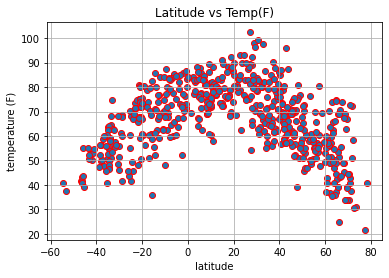

In [130]:
# create temp vs lat scatter
y1= info_df['Temperatures']
x1= info_df['Latitude']
plt.scatter(x1,y1, marker='o',edgecolors='red')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

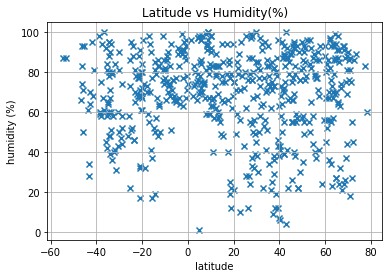

In [131]:
# create humidity vs lat scatter
x2= info_df['Latitude']
y2= info_df['Humidity']
plt.scatter(x2,y2, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('Latitude vs Humidity(%)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

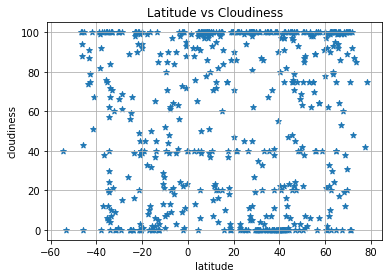

In [132]:
# create cloudiness vs lat scatter
x3= info_df['Latitude']
y3= info_df['Cloudiness']
plt.scatter(x3,y3, marker='*')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

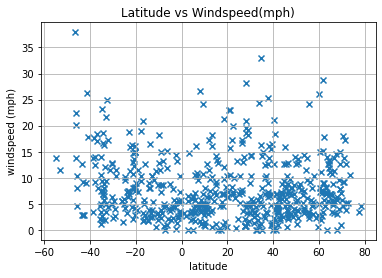

In [133]:
# create humidity vs lat scatter
x4= info_df['Latitude']
y4= info_df['Windspeed']
plt.scatter(x4,y4, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
plt.show

## Linear Regression

### Northern Hemisphere

In [134]:
# using original dataframe create a northern hemisphere dataframe 
# in this case latitude will be > 0
# equator = 0
northern_hem_df = info_df[info_df['Latitude']>0]
northern_hem_df.head()

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
1,sfantu gheorghe,RO,45.8667,25.7833,93,0.47,76,56.46,1655176677
2,matale,LK,7.4721,80.6234,67,4.90,100,80.82,1655176677
5,jiwani,PK,25.0500,61.7417,80,6.82,0,82.83,1655176678
6,baruun-urt,MN,46.6806,113.2792,38,8.72,45,69.67,1655176678
7,norman wells,CA,65.2820,-126.8329,91,6.85,99,42.33,1655176678


The r-squared is: 0.4826202294271994


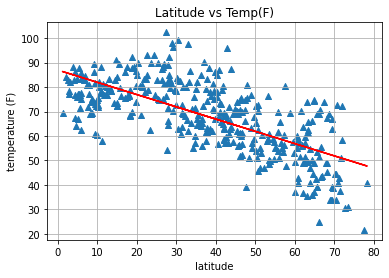

In [142]:
# linregress temp vs lat on scatter
yn1= northern_hem_df['Temperatures']
xn1= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn1, yn1)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn1,yn1, marker='^')
plt.plot(xn1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004565942548517132


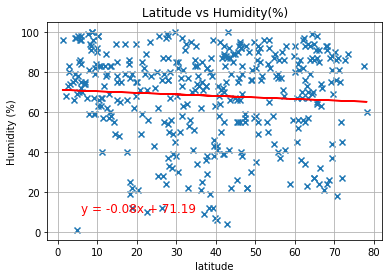

In [145]:
# linregress humidity vs lat on scatter
yn2= northern_hem_df['Humidity']
xn2= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn2, yn2)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn2,yn2, marker='x')
plt.plot(xn2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0002338815576405048


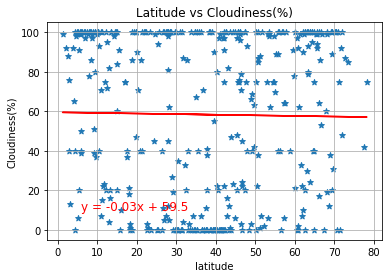

In [146]:
# linregress cloudiness vs lat on scatter
yn3= northern_hem_df['Cloudiness']
xn3= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn3, yn3)
regress_values = xn3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn3,yn3, marker='*')
plt.plot(xn3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.003942687939591102


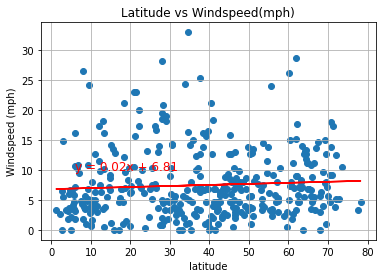

In [147]:
# linregress windspeed vs lat on scatter
yn4= northern_hem_df['Windspeed']
xn4= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn4, yn4)
regress_values = xn4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn4,yn4, marker='o')
plt.plot(xn4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere

In [112]:
# using original dataframe create a southern hemisphere dataframe 
# in this case latitude will be < 0
# equator = 0
southern_hem_df = info_df[info_df['Latitude']<0]
southern_hem_df.head()

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
1,busselton,AU,-33.6500,115.3333,68,8.21,13,61.27,1655169926
2,kruisfontein,ZA,-34.0033,24.7314,50,3.69,100,59.20,1655169927
3,port alfred,ZA,-33.5906,26.8910,50,7.07,100,69.87,1655169927
6,saldanha,ZA,-33.0117,17.9442,78,19.44,14,57.43,1655169928
7,mahebourg,MU,-20.4081,57.7000,68,17.27,40,71.89,1655169708


The r-squared is: 0.5611090626048459


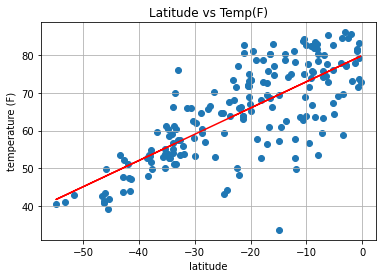

In [113]:
# linregress temp vs lat on scatter
ys1= southern_hem_df['Temperatures']
xs1= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs1, ys1)
regress_values = xs1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs1,ys1, marker='o')
plt.plot(xs1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012928731328857702


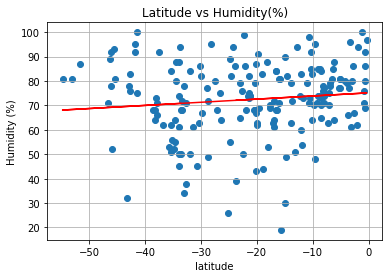

In [116]:
# linregress temp vs lat on scatter
ys2= southern_hem_df['Humidity']
xs2= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs2, ys2)
regress_values = xs2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs2,ys2, marker='o')
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02189985812101162


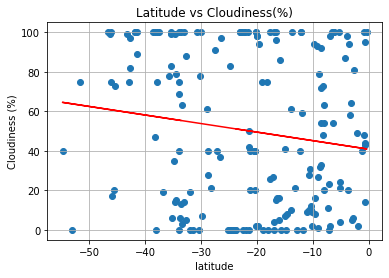

In [117]:
# linregress temp vs lat on scatter
ys3= southern_hem_df['Cloudiness']
xs3= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs3, ys3)
regress_values = xs3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs3,ys3, marker='o')
plt.plot(xs3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10757620681982745


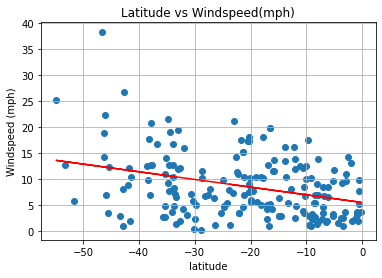

In [119]:
# linregress windspeed vs lat on scatter
ys4= southern_hem_df['Windspeed']
xs4= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs4, ys4)
regress_values = xs4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs4,ys4, marker='o')
plt.plot(xs4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()